**Import Required Libraries**

In [ ]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
import os

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path=r'/content/drive/MyDrive/Data Cap4/archive/2nd_test/2nd_test'

In [ ]:
filename = '2004.02.12.10.32.39'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

In [ ]:
dataset

,0,1,2,3
0,-0.049,-0.071,-0.132,-0.010
1,-0.042,-0.073,-0.007,-0.105
2,0.015,0.000,0.007,0.000
3,-0.051,0.020,-0.002,0.100
4,-0.107,0.010,0.127,0.054
...,...,...,...,...
20475,0.049,-0.051,-0.039,-0.044
20476,0.037,0.061,0.115,0.007
20477,-0.012,0.007,0.056,-0.007
20478,-0.012,0.093,0.017,-0.044


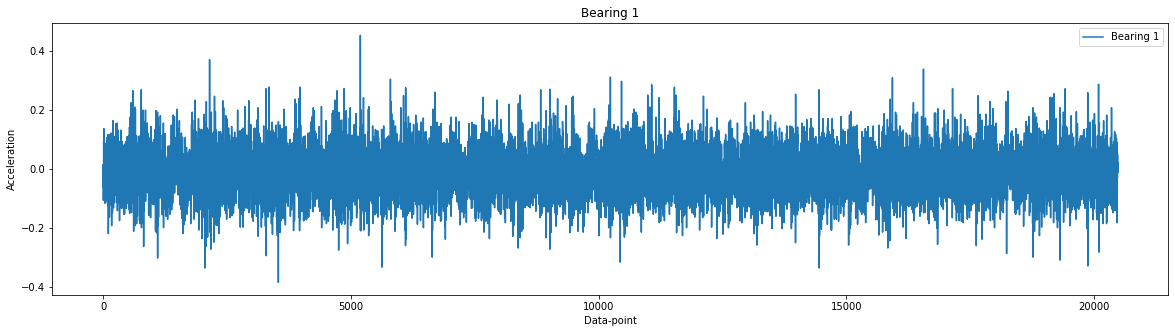

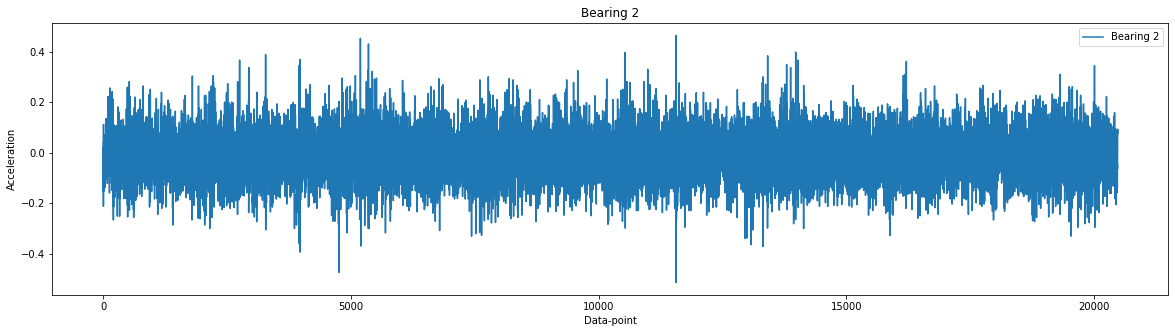

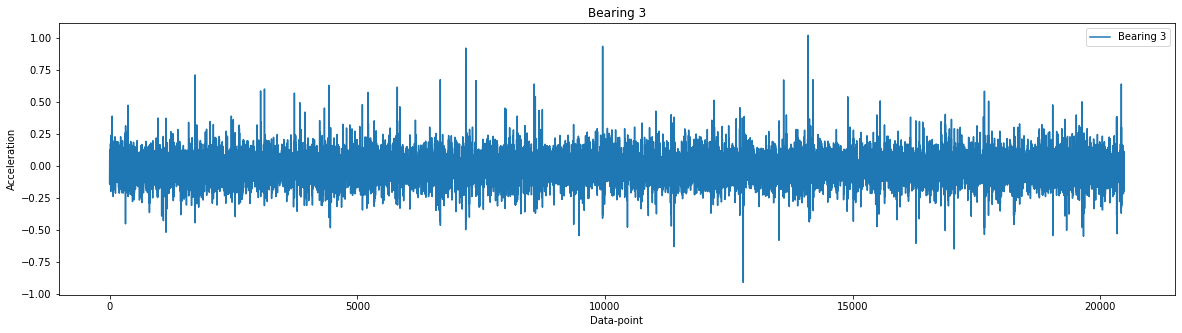

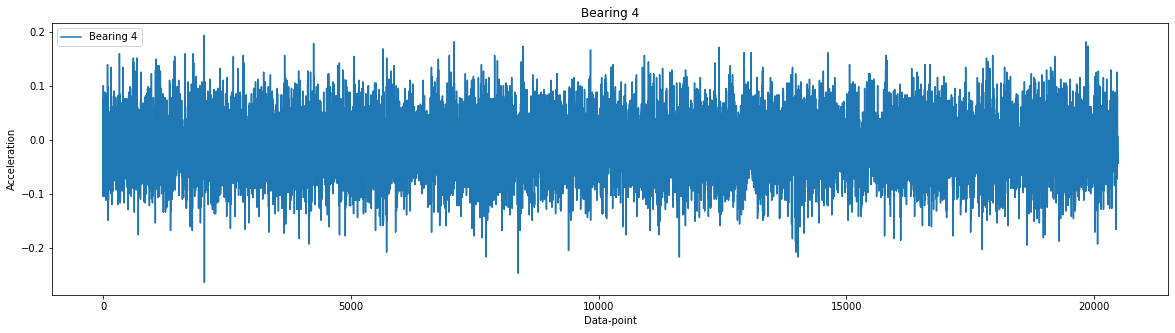

In [ ]:
for i in [0,1,2,3]:
    
    df_bearing=np.array(dataset.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    plt.plot(df_bearing)

    plt.legend(['Bearing {}'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {}'.format(i+1))
    plt.show()

In [ ]:
bearing_no1=1

bearing_data1 = np.array(dataset.iloc[:,bearing_no1-1])

bearing_data1

array([-0.049, -0.042,  0.015, ..., -0.012, -0.012,  0.02 ])

In [ ]:
bearing_no2=2

bearing_data2 = np.array(dataset.iloc[:,bearing_no2-1])

bearing_data2

array([-0.071, -0.073,  0.   , ...,  0.007,  0.093,  0.076])

In [ ]:
bearing_no3=3

bearing_data3 = np.array(dataset.iloc[:,bearing_no3-1])

bearing_data3

array([-0.132, -0.007,  0.007, ...,  0.056,  0.017, -0.042])

In [ ]:
bearing_no4=4

bearing_data4 = np.array(dataset.iloc[:,bearing_no4-1])

bearing_data4

array([-0.01 , -0.105,  0.   , ..., -0.007, -0.044, -0.029])

In [ ]:
temp1 = bearing_data1
print(temp1)

temp2 = bearing_data2
print(temp2)

temp3 = bearing_data3
print(temp3)

temp4 = bearing_data4
print(temp4)

[-0.049 -0.042  0.015 ... -0.012 -0.012  0.02 ]
[-0.071 -0.073  0.    ...  0.007  0.093  0.076]
[-0.132 -0.007  0.007 ...  0.056  0.017 -0.042]
[-0.01  -0.105  0.    ... -0.007 -0.044 -0.029]


In [ ]:
# extracting features from this bearing data

feature_matrix1=np.zeros((1,9))
feature_matrix1

feature_matrix2=np.zeros((1,9))
feature_matrix2

feature_matrix3=np.zeros((1,9))
feature_matrix3

feature_matrix4=np.zeros((1,9))
feature_matrix4

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
'''We will calculate following time domain features.

Maximum value
Minimum value
Mean value
Standard deviation (Unbiased std)
Root mean square value (RMS)
Skewness
Kurtosis
Crest factor = Max/RMS
Form factor = RMS/Mean'''

def compute_skewness(x):
    
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3
def compute_kurtosis(x):
    
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [ ]:
feature_matrix1[0,0] = np.max(temp1)
feature_matrix1[0,1] = np.min(temp1)
feature_matrix1[0,2] = np.mean(temp1)
feature_matrix1[0,3] = np.std(temp1, ddof = 1)
feature_matrix1[0,4] = np.sqrt(np.mean(temp1 ** 2))
feature_matrix1[0,5] = compute_skewness(temp1)
feature_matrix1[0,6] = compute_kurtosis(temp1)
feature_matrix1[0,7] = feature_matrix1[0,0]/feature_matrix1[0,4]
feature_matrix1[0,8] = feature_matrix1[0,4]/feature_matrix1[0,2]


feature_matrix2[0,0] = np.max(temp2)
feature_matrix2[0,1] = np.min(temp2)
feature_matrix2[0,2] = np.mean(temp2)
feature_matrix2[0,3] = np.std(temp2, ddof = 1)
feature_matrix2[0,4] = np.sqrt(np.mean(temp2 ** 2))
feature_matrix2[0,5] = compute_skewness(temp2)
feature_matrix2[0,6] = compute_kurtosis(temp2)
feature_matrix2[0,7] = feature_matrix2[0,0]/feature_matrix2[0,4]
feature_matrix2[0,8] = feature_matrix2[0,4]/feature_matrix2[0,2]


feature_matrix3[0,0] = np.max(temp3)
feature_matrix3[0,1] = np.min(temp3)
feature_matrix3[0,2] = np.mean(temp3)
feature_matrix3[0,3] = np.std(temp3, ddof = 1)
feature_matrix3[0,4] = np.sqrt(np.mean(temp3 ** 2))
feature_matrix3[0,5] = compute_skewness(temp3)
feature_matrix3[0,6] = compute_kurtosis(temp3)
feature_matrix3[0,7] = feature_matrix3[0,0]/feature_matrix3[0,4]
feature_matrix3[0,8] = feature_matrix3[0,4]/feature_matrix3[0,2]


feature_matrix4[0,0] = np.max(temp4)
feature_matrix4[0,1] = np.min(temp4)
feature_matrix4[0,2] = np.mean(temp4)
feature_matrix4[0,3] = np.std(temp4, ddof = 1)
feature_matrix4[0,4] = np.sqrt(np.mean(temp4 ** 2))
feature_matrix4[0,5] = compute_skewness(temp4)
feature_matrix4[0,6] = compute_kurtosis(temp4)
feature_matrix4[0,7] = feature_matrix4[0,0]/feature_matrix4[0,4]
feature_matrix4[0,8] = feature_matrix4[0,4]/feature_matrix4[0,2]

In [ ]:
feature_matrix1

array([[ 0.454     , -0.386     , -0.010196  ,  0.07347672,  0.074179  ,
         0.08398728,  0.62840828,  6.12033067, -7.27530669]])

In [ ]:
feature_matrix2

array([[ 0.464     , -0.513     , -0.01269497,  0.09005567,  0.09094389,
         0.12690557,  0.50645808,  5.10204716, -7.16377289]])

In [ ]:
feature_matrix3

array([[ 1.023     , -0.911     , -0.01454097,  0.10843616,  0.10940414,
         0.20482471,  3.21246794,  9.3506517 , -7.52385593]])

In [ ]:
feature_matrix4

array([[ 0.193     , -0.264     , -0.01002598,  0.05316769,  0.05410347,
        -0.02207839,  0.06565965,  3.56723898, -5.396329  ]])

In [ ]:
df1 = pd.DataFrame(feature_matrix1)
df1.index=[filename[:-3]]
df1

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307


In [ ]:
df2 = pd.DataFrame(feature_matrix2)
df2.index=[filename[:-3]]
df2

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.464,-0.513,-0.012695,0.090056,0.090944,0.126906,0.506458,5.102047,-7.163773


In [ ]:
df3 = pd.DataFrame(feature_matrix3)
df3.index=[filename[:-3]]
df3

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,1.023,-0.911,-0.014541,0.108436,0.109404,0.204825,3.212468,9.350652,-7.523856


In [ ]:
df4 = pd.DataFrame(feature_matrix4)
df4.index=[filename[:-3]]
df4

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.193,-0.264,-0.010026,0.053168,0.054103,-0.022078,0.06566,3.567239,-5.396329


In [ ]:
Time_feature_matrix1=pd.DataFrame()

test_set=2

bearing_no1=1 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'/content/drive/MyDrive/Data Cap4/archive/2nd_test/2nd_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data1 = np.array(dataset.iloc[:,bearing_no1-1])

    feature_matrix1=np.zeros((1,9))
    temp1 = bearing_data1
    feature_matrix1[0,0] = np.max(temp1)
    feature_matrix1[0,1] = np.min(temp1)
    feature_matrix1[0,2] = np.mean(temp1)
    feature_matrix1[0,3] = np.std(temp1, ddof = 1)
    feature_matrix1[0,4] = np.sqrt(np.mean(temp1 ** 2))
    feature_matrix1[0,5] = compute_skewness(temp1)
    feature_matrix1[0,6] = compute_kurtosis(temp1)
    feature_matrix1[0,7] = feature_matrix1[0,0]/feature_matrix1[0,4]
    feature_matrix1[0,8] = feature_matrix1[0,4]/feature_matrix1[0,2]
    
    df1 = pd.DataFrame(feature_matrix1)
    df1.index=[filename[:-3]]
    
    Time_feature_matrix1 = Time_feature_matrix1.append(df1)

In [ ]:
Time_feature_matrix1

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004.02.12.10.52,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004.02.12.10.42,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004.02.12.11.02,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004.02.12.11.12,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004.02.19.05.42,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004.02.19.05.52,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004.02.19.06.02,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004.02.19.06.12,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [ ]:
Time_feature_matrix1.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix1.index = pd.to_datetime(Time_feature_matrix1.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix1 = Time_feature_matrix1.sort_index()

Time_feature_matrix1.to_csv('Time_feature_matrix1_Bearing_{}_Test_{}.csv'.format(bearing_no1,test_set))

Time_feature_matrix1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [ ]:
Time_feature_matrix2=pd.DataFrame()

test_set=2

bearing_no2=2 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'/content/drive/MyDrive/Data Cap4/archive/2nd_test/2nd_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data2 = np.array(dataset.iloc[:,bearing_no2-1])

    feature_matrix2=np.zeros((1,9))
    temp2 = bearing_data2
    feature_matrix2[0,0] = np.max(temp2)
    feature_matrix2[0,1] = np.min(temp2)
    feature_matrix2[0,2] = np.mean(temp2)
    feature_matrix2[0,3] = np.std(temp2, ddof = 1)
    feature_matrix2[0,4] = np.sqrt(np.mean(temp2 ** 2))
    feature_matrix2[0,5] = compute_skewness(temp2)
    feature_matrix2[0,6] = compute_kurtosis(temp2)
    feature_matrix2[0,7] = feature_matrix2[0,0]/feature_matrix2[0,4]
    feature_matrix2[0,8] = feature_matrix2[0,4]/feature_matrix2[0,2]
    
    df2 = pd.DataFrame(feature_matrix2)
    df2.index=[filename[:-3]]
    
    Time_feature_matrix2 = Time_feature_matrix2.append(df2)

In [ ]:
Time_feature_matrix2

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.464,-0.513,-0.012695,0.090056,0.090944,0.126906,0.506458,5.102047,-7.163773
2004.02.12.10.52,0.491,-0.503,-0.001695,0.093705,0.093718,0.096575,0.310466,5.239127,-55.275827
2004.02.12.10.42,0.457,-0.481,-0.002561,0.093386,0.093419,0.070083,0.252696,4.891944,-36.478394
2004.02.12.11.02,0.569,-0.474,-0.002393,0.092919,0.092947,0.105826,0.235025,6.121762,-38.844130
2004.02.12.11.12,0.452,-0.486,-0.001559,0.095338,0.095348,0.097958,0.225994,4.740531,-61.158395
...,...,...,...,...,...,...,...,...,...
2004.02.19.05.42,1.118,-0.884,-0.000838,0.218298,0.218294,0.641960,2.452206,5.121522,-260.558973
2004.02.19.05.52,0.908,-0.637,-0.000910,0.170819,0.170817,0.464408,0.910876,5.315634,-187.799539
2004.02.19.06.02,0.891,-0.752,-0.001632,0.193639,0.193641,0.386833,0.330302,4.601296,-118.636161
2004.02.19.06.12,0.007,0.000,0.003731,0.001490,0.004018,-0.289618,-1.871150,1.742236,1.076734


In [ ]:
Time_feature_matrix2.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix2.index = pd.to_datetime(Time_feature_matrix2.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix2 = Time_feature_matrix2.sort_index()

Time_feature_matrix2.to_csv('Time_feature_matrix2_Bearing_{}_Test_{}.csv'.format(bearing_no2,test_set))

Time_feature_matrix2

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.464,-0.513,-0.012695,0.090056,0.090944,0.126906,0.506458,5.102047,-7.163773
2004-02-12 10:42:00,0.457,-0.481,-0.002561,0.093386,0.093419,0.070083,0.252696,4.891944,-36.478394
2004-02-12 10:52:00,0.491,-0.503,-0.001695,0.093705,0.093718,0.096575,0.310466,5.239127,-55.275827
2004-02-12 11:02:00,0.569,-0.474,-0.002393,0.092919,0.092947,0.105826,0.235025,6.121762,-38.844130
2004-02-12 11:12:00,0.452,-0.486,-0.001559,0.095338,0.095348,0.097958,0.225994,4.740531,-61.158395
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,1.118,-0.884,-0.000838,0.218298,0.218294,0.641960,2.452206,5.121522,-260.558973
2004-02-19 05:52:00,0.908,-0.637,-0.000910,0.170819,0.170817,0.464408,0.910876,5.315634,-187.799539
2004-02-19 06:02:00,0.891,-0.752,-0.001632,0.193639,0.193641,0.386833,0.330302,4.601296,-118.636161
2004-02-19 06:12:00,0.007,0.000,0.003731,0.001490,0.004018,-0.289618,-1.871150,1.742236,1.076734


In [ ]:
Time_feature_matrix3=pd.DataFrame()

test_set=2

bearing_no3=3 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'/content/drive/MyDrive/Data Cap4/archive/2nd_test/2nd_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data3 = np.array(dataset.iloc[:,bearing_no3-1])

    feature_matrix3=np.zeros((1,9))
    temp3 = bearing_data3
    feature_matrix3[0,0] = np.max(temp3)
    feature_matrix3[0,1] = np.min(temp3)
    feature_matrix3[0,2] = np.mean(temp3)
    feature_matrix3[0,3] = np.std(temp3, ddof = 1)
    feature_matrix3[0,4] = np.sqrt(np.mean(temp3 ** 2))
    feature_matrix3[0,5] = compute_skewness(temp3)
    feature_matrix3[0,6] = compute_kurtosis(temp3)
    feature_matrix3[0,7] = feature_matrix3[0,0]/feature_matrix3[0,4]
    feature_matrix3[0,8] = feature_matrix3[0,4]/feature_matrix3[0,2]
    
    df3 = pd.DataFrame(feature_matrix3)
    df3.index=[filename[:-3]]
    
    Time_feature_matrix3 = Time_feature_matrix3.append(df3)

In [ ]:
Time_feature_matrix3

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,1.023,-0.911,-0.014541,0.108436,0.109404,0.204825,3.212468,9.350652,-7.523856
2004.02.12.10.52,0.933,-0.786,-0.001595,0.109852,0.109861,0.056557,2.639397,8.492546,-68.858586
2004.02.12.10.42,0.752,-0.681,-0.002461,0.109792,0.109817,-0.023852,1.394821,6.847735,-44.626842
2004.02.12.11.02,1.016,-0.935,-0.003148,0.110624,0.110667,0.033548,2.682224,9.180734,-35.155121
2004.02.12.11.12,0.745,-0.771,-0.001158,0.107502,0.107506,-0.002892,1.577948,6.929872,-92.797551
...,...,...,...,...,...,...,...,...,...
2004.02.19.05.42,0.686,-0.769,-0.001911,0.170570,0.170577,-0.011975,-0.098321,4.021649,-89.261120
2004.02.19.05.52,0.764,-0.725,-0.001348,0.177877,0.177878,0.111051,-0.319468,4.295083,-131.961801
2004.02.19.06.02,0.845,-0.784,-0.001365,0.187405,0.187405,0.247077,-0.135942,4.508940,-137.245256
2004.02.19.06.12,0.007,0.000,0.003656,0.001496,0.003950,-0.196107,-1.935522,1.772075,1.080519


In [ ]:
Time_feature_matrix3.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix3.index = pd.to_datetime(Time_feature_matrix3.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix3 = Time_feature_matrix3.sort_index()

Time_feature_matrix3.to_csv('Time_feature_matrix3_Bearing_{}_Test_{}.csv'.format(bearing_no3,test_set))

Time_feature_matrix3

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,1.023,-0.911,-0.014541,0.108436,0.109404,0.204825,3.212468,9.350652,-7.523856
2004-02-12 10:42:00,0.752,-0.681,-0.002461,0.109792,0.109817,-0.023852,1.394821,6.847735,-44.626842
2004-02-12 10:52:00,0.933,-0.786,-0.001595,0.109852,0.109861,0.056557,2.639397,8.492546,-68.858586
2004-02-12 11:02:00,1.016,-0.935,-0.003148,0.110624,0.110667,0.033548,2.682224,9.180734,-35.155121
2004-02-12 11:12:00,0.745,-0.771,-0.001158,0.107502,0.107506,-0.002892,1.577948,6.929872,-92.797551
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,0.686,-0.769,-0.001911,0.170570,0.170577,-0.011975,-0.098321,4.021649,-89.261120
2004-02-19 05:52:00,0.764,-0.725,-0.001348,0.177877,0.177878,0.111051,-0.319468,4.295083,-131.961801
2004-02-19 06:02:00,0.845,-0.784,-0.001365,0.187405,0.187405,0.247077,-0.135942,4.508940,-137.245256
2004-02-19 06:12:00,0.007,0.000,0.003656,0.001496,0.003950,-0.196107,-1.935522,1.772075,1.080519


In [ ]:
Time_feature_matrix4=pd.DataFrame()

test_set=2

bearing_no4=4 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'/content/drive/MyDrive/Data Cap4/archive/2nd_test/2nd_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data4 = np.array(dataset.iloc[:,bearing_no4-1])

    feature_matrix4=np.zeros((1,9))
    temp4 = bearing_data4
    feature_matrix4[0,0] = np.max(temp4)
    feature_matrix4[0,1] = np.min(temp4)
    feature_matrix4[0,2] = np.mean(temp4)
    feature_matrix4[0,3] = np.std(temp4, ddof = 1)
    feature_matrix4[0,4] = np.sqrt(np.mean(temp4 ** 2))
    feature_matrix4[0,5] = compute_skewness(temp4)
    feature_matrix4[0,6] = compute_kurtosis(temp4)
    feature_matrix4[0,7] = feature_matrix4[0,0]/feature_matrix4[0,4]
    feature_matrix4[0,8] = feature_matrix4[0,4]/feature_matrix4[0,2]
    
    df4 = pd.DataFrame(feature_matrix4)
    df4.index=[filename[:-3]]
    
    Time_feature_matrix4 = Time_feature_matrix4.append(df4)

In [ ]:
Time_feature_matrix4

,0,1,2,3,4,5,6,7,8
2004.02.12.10.32,0.193,-0.264,-0.010026,0.053168,0.054103,-0.022078,0.065660,3.567239,-5.396329
2004.02.12.10.52,0.354,-0.334,-0.003485,0.056038,0.056145,0.070444,0.256918,6.305078,-16.108911
2004.02.12.10.42,0.249,-0.229,-0.003784,0.055974,0.056101,0.001582,0.107236,4.438435,-14.827018
2004.02.12.11.02,0.513,-0.525,-0.003741,0.056686,0.056807,-0.036324,0.805818,9.030509,-15.186020
2004.02.12.11.12,0.244,-0.212,-0.002703,0.056778,0.056841,0.019006,0.138647,4.292680,-21.032042
...,...,...,...,...,...,...,...,...,...
2004.02.19.05.42,0.542,-0.544,-0.002939,0.148326,0.148351,-0.051945,-0.093570,3.653494,-50.473985
2004.02.19.05.52,0.527,-0.449,-0.003315,0.116586,0.116630,0.119884,0.259273,4.518571,-35.180992
2004.02.19.06.02,0.625,-0.479,-0.003311,0.130544,0.130582,0.167966,0.696806,4.786252,-39.440269
2004.02.19.06.12,0.005,-0.002,0.001786,0.001204,0.002154,0.656632,1.652267,2.321622,1.206167


In [ ]:
Time_feature_matrix4.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix4.index = pd.to_datetime(Time_feature_matrix4.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix4 = Time_feature_matrix4.sort_index()

Time_feature_matrix4.to_csv('Time_feature_matrix4_Bearing_{}_Test_{}.csv'.format(bearing_no4,test_set))

Time_feature_matrix4

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.193,-0.264,-0.010026,0.053168,0.054103,-0.022078,0.065660,3.567239,-5.396329
2004-02-12 10:42:00,0.249,-0.229,-0.003784,0.055974,0.056101,0.001582,0.107236,4.438435,-14.827018
2004-02-12 10:52:00,0.354,-0.334,-0.003485,0.056038,0.056145,0.070444,0.256918,6.305078,-16.108911
2004-02-12 11:02:00,0.513,-0.525,-0.003741,0.056686,0.056807,-0.036324,0.805818,9.030509,-15.186020
2004-02-12 11:12:00,0.244,-0.212,-0.002703,0.056778,0.056841,0.019006,0.138647,4.292680,-21.032042
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,0.542,-0.544,-0.002939,0.148326,0.148351,-0.051945,-0.093570,3.653494,-50.473985
2004-02-19 05:52:00,0.527,-0.449,-0.003315,0.116586,0.116630,0.119884,0.259273,4.518571,-35.180992
2004-02-19 06:02:00,0.625,-0.479,-0.003311,0.130544,0.130582,0.167966,0.696806,4.786252,-39.440269
2004-02-19 06:12:00,0.005,-0.002,0.001786,0.001204,0.002154,0.656632,1.652267,2.321622,1.206167


**Test-2 Bearing Dataset Visualization**


*   Recording Duration: February 12, 2004 10:32:39 to February 19, 2004 06:22:39
*   No. of Files: 984
*   No. of Channels: 4
*   Channel Arrangement: Bearing 1 – Ch 1; Bearing2 – Ch 2; Bearing3 – Ch3; Bearing 4 – Ch 4.
*   File Recording Interval: Every 10 minutes
*   File Format: ASCII
*   Description: At the end of the test-to-failure experiment, outer race failure occurred in bearing 1.

In [ ]:
df1 = pd.read_csv("Time_feature_matrix1_Bearing_1_Test_2.csv")
df1 = pd.read_csv("Time_feature_matrix1_Bearing_1_Test_2.csv",index_col='Unnamed: 0')
df1.index = pd.to_datetime(df1.index)
df1

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.454,-0.386,-0.010196,0.073477,0.074179,0.083987,0.628408,6.120331,-7.275307
2004-02-12 10:42:00,0.369,-0.388,-0.002585,0.075340,0.075382,0.052138,0.647935,4.895038,-29.161382
2004-02-12 10:52:00,0.503,-0.400,-0.002484,0.076191,0.076230,0.032806,0.513132,6.598472,-30.688508
2004-02-12 11:02:00,0.608,-0.576,-0.002277,0.078693,0.078724,0.041483,1.157547,7.723217,-34.579322
2004-02-12 11:12:00,0.391,-0.391,-0.002404,0.078439,0.078474,0.028222,0.602825,4.982524,-32.645152
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,4.998,-5.000,-0.002752,0.725014,0.725001,-0.510519,12.576183,6.893779,-263.426419
2004-02-19 05:52:00,2.688,-2.881,-0.004487,0.462001,0.462012,-0.325344,3.759312,5.818035,-102.977656
2004-02-19 06:02:00,3.501,-3.696,-0.001703,0.483844,0.483835,-0.377068,4.890985,7.235932,-284.094983
2004-02-19 06:12:00,0.005,0.000,0.001857,0.000987,0.002103,0.579656,3.636864,2.377543,1.132578


In [ ]:
df2 = pd.read_csv("Time_feature_matrix2_Bearing_2_Test_2.csv")
df2 = pd.read_csv("Time_feature_matrix2_Bearing_2_Test_2.csv",index_col='Unnamed: 0')
df2.index = pd.to_datetime(df2.index)
df2

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.464,-0.513,-0.012695,0.090056,0.090944,0.126906,0.506458,5.102047,-7.163773
2004-02-12 10:42:00,0.457,-0.481,-0.002561,0.093386,0.093419,0.070083,0.252696,4.891944,-36.478394
2004-02-12 10:52:00,0.491,-0.503,-0.001695,0.093705,0.093718,0.096575,0.310466,5.239127,-55.275827
2004-02-12 11:02:00,0.569,-0.474,-0.002393,0.092919,0.092947,0.105826,0.235025,6.121762,-38.844130
2004-02-12 11:12:00,0.452,-0.486,-0.001559,0.095338,0.095348,0.097958,0.225994,4.740531,-61.158395
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,1.118,-0.884,-0.000838,0.218298,0.218294,0.641960,2.452206,5.121522,-260.558973
2004-02-19 05:52:00,0.908,-0.637,-0.000910,0.170819,0.170817,0.464408,0.910876,5.315634,-187.799539
2004-02-19 06:02:00,0.891,-0.752,-0.001632,0.193639,0.193641,0.386833,0.330302,4.601296,-118.636161
2004-02-19 06:12:00,0.007,0.000,0.003731,0.001490,0.004018,-0.289618,-1.871150,1.742236,1.076734


In [ ]:
df3 = pd.read_csv("Time_feature_matrix3_Bearing_3_Test_2.csv")
df3 = pd.read_csv("Time_feature_matrix3_Bearing_3_Test_2.csv",index_col='Unnamed: 0')
df3.index = pd.to_datetime(df3.index)
df3

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,1.023,-0.911,-0.014541,0.108436,0.109404,0.204825,3.212468,9.350652,-7.523856
2004-02-12 10:42:00,0.752,-0.681,-0.002461,0.109792,0.109817,-0.023852,1.394821,6.847735,-44.626842
2004-02-12 10:52:00,0.933,-0.786,-0.001595,0.109852,0.109861,0.056557,2.639397,8.492546,-68.858586
2004-02-12 11:02:00,1.016,-0.935,-0.003148,0.110624,0.110667,0.033548,2.682224,9.180734,-35.155121
2004-02-12 11:12:00,0.745,-0.771,-0.001158,0.107502,0.107506,-0.002892,1.577948,6.929872,-92.797551
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,0.686,-0.769,-0.001911,0.170570,0.170577,-0.011975,-0.098321,4.021649,-89.261120
2004-02-19 05:52:00,0.764,-0.725,-0.001348,0.177877,0.177878,0.111051,-0.319468,4.295083,-131.961801
2004-02-19 06:02:00,0.845,-0.784,-0.001365,0.187405,0.187405,0.247077,-0.135942,4.508940,-137.245256
2004-02-19 06:12:00,0.007,0.000,0.003656,0.001496,0.003950,-0.196107,-1.935522,1.772075,1.080519


In [ ]:
df4 = pd.read_csv("Time_feature_matrix4_Bearing_4_Test_2.csv")
df4 = pd.read_csv("Time_feature_matrix4_Bearing_4_Test_2.csv",index_col='Unnamed: 0')
df4.index = pd.to_datetime(df4.index)
df4

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2004-02-12 10:32:00,0.193,-0.264,-0.010026,0.053168,0.054103,-0.022078,0.065660,3.567239,-5.396329
2004-02-12 10:42:00,0.249,-0.229,-0.003784,0.055974,0.056101,0.001582,0.107236,4.438435,-14.827018
2004-02-12 10:52:00,0.354,-0.334,-0.003485,0.056038,0.056145,0.070444,0.256918,6.305078,-16.108911
2004-02-12 11:02:00,0.513,-0.525,-0.003741,0.056686,0.056807,-0.036324,0.805818,9.030509,-15.186020
2004-02-12 11:12:00,0.244,-0.212,-0.002703,0.056778,0.056841,0.019006,0.138647,4.292680,-21.032042
...,...,...,...,...,...,...,...,...,...
2004-02-19 05:42:00,0.542,-0.544,-0.002939,0.148326,0.148351,-0.051945,-0.093570,3.653494,-50.473985
2004-02-19 05:52:00,0.527,-0.449,-0.003315,0.116586,0.116630,0.119884,0.259273,4.518571,-35.180992
2004-02-19 06:02:00,0.625,-0.479,-0.003311,0.130544,0.130582,0.167966,0.696806,4.786252,-39.440269
2004-02-19 06:12:00,0.005,-0.002,0.001786,0.001204,0.002154,0.656632,1.652267,2.321622,1.206167


**Visualizing The Bearing Data**

In [ ]:
df1.columns

Index(['Max', 'Min', 'Mean', 'Std', 'RMS', 'Skewness', 'Kurtosis',
       'Crest Factor', 'Form Factor'],
      dtype='object')

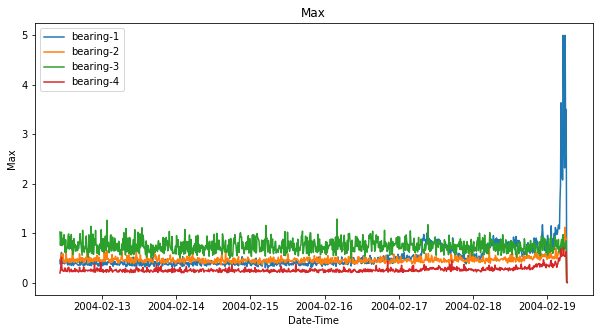

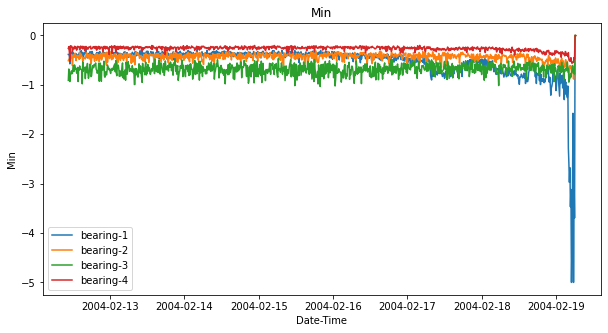

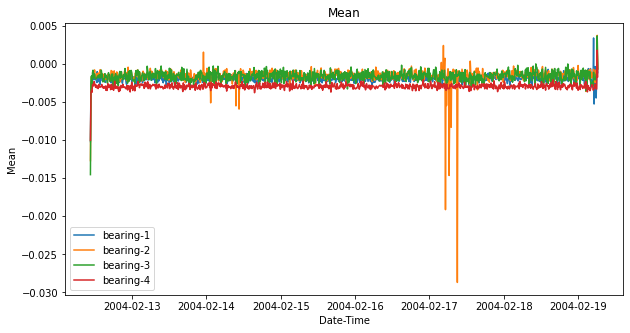

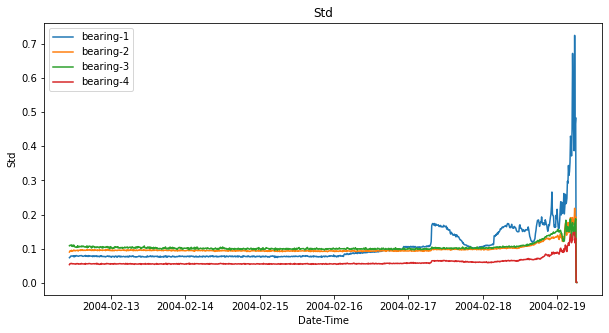

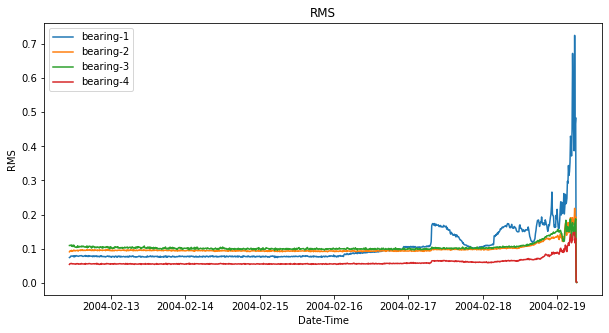

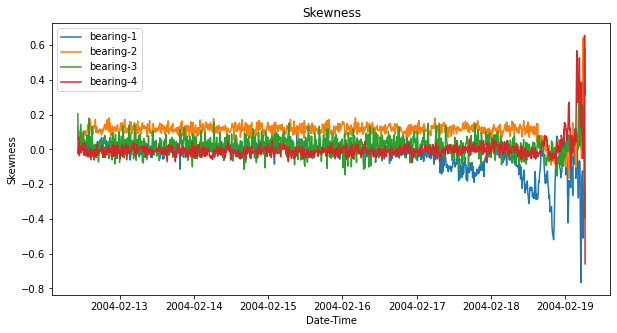

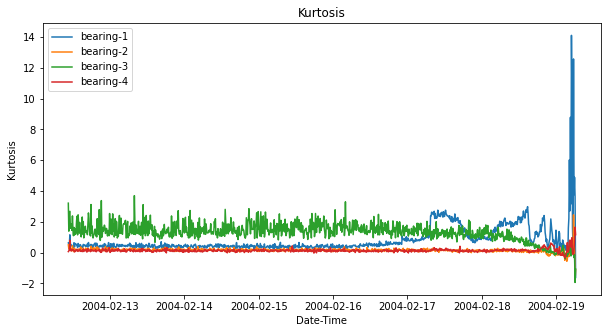

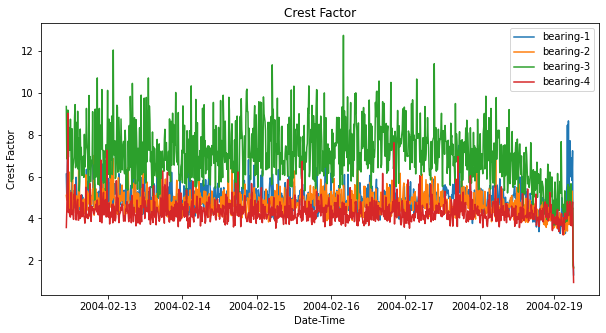

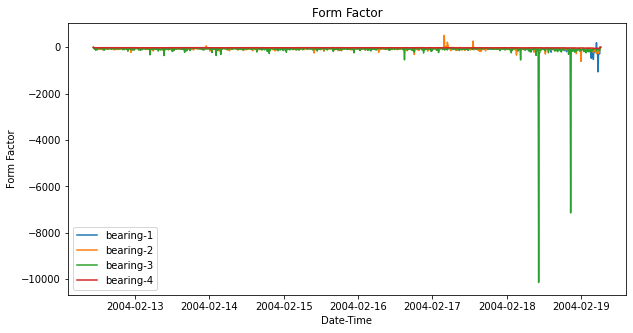

In [ ]:
for col in (df1.columns):  
    
        plt.figure(figsize=(10, 5))
        plt.plot(df1.index,df1[col])
        plt.plot(df1.index,df2[col])
        plt.plot(df1.index,df3[col])
        plt.plot(df1.index,df4[col])

        plt.legend(['bearing-1','bearing-2','bearing-3','bearing-4'])

        plt.xlabel("Date-Time")
        plt.ylabel(col)
        plt.title(col)
        plt.show()

**Saving the Outer Race Fault**

In [ ]:
df=df1['2004-02-17 12:32:00':'2004-02-19 00:42:00']

In [ ]:
fault=[]
for i in range (0,len(df)):
    fault.append('Outer Race')

df['Fault']=fault
df   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
2004-02-17 12:32:00,0.789,-0.781,-0.001874,0.162117,0.162124,-0.076375,2.539286,4.866637,-86.515839,Outer Race
2004-02-17 12:42:00,0.803,-0.723,-0.001712,0.155821,0.155826,-0.087399,2.463552,5.153178,-91.001170,Outer Race
2004-02-17 12:52:00,0.879,-0.725,-0.002833,0.156768,0.156790,-0.082349,2.397298,5.606226,-55.341134,Outer Race
2004-02-17 13:02:00,0.784,-0.754,-0.002073,0.154166,0.154177,-0.050836,2.380468,5.085081,-74.391213,Outer Race
2004-02-17 13:12:00,0.854,-0.698,-0.001955,0.155019,0.155028,-0.079743,2.385198,5.508694,-79.314679,Outer Race
...,...,...,...,...,...,...,...,...,...,...
2004-02-19 00:02:00,0.955,-1.118,-0.001586,0.215437,0.215437,-0.080072,1.458276,4.432845,-135.796235,Outer Race
2004-02-19 00:12:00,0.710,-1.021,-0.001834,0.183846,0.183851,-0.146662,0.885198,3.861822,-100.230775,Outer Race
2004-02-19 00:22:00,0.693,-0.728,-0.001688,0.163871,0.163876,0.120602,0.264161,4.228812,-97.072275,Outer Race
2004-02-19 00:32:00,0.647,-0.696,-0.002102,0.158311,0.158321,0.053990,0.326583,4.086625,-75.329810,Outer Race


In [ ]:
df.to_csv('outer_race_fault_test_2.csv',index=False)

In [ ]:
from google.colab import files
files.download('outer_race_fault_test_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Saving the Normal Bearing data**

In [ ]:
df=df1['2004-02-13 12:32:00':'2004-02-15 00:42:00']
fault=[]
for i in range (0,len(df)):
    fault.append('Normal')
    
df['Fault']=fault

df.to_csv('NormalTest2.csv',index=False)   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df=pd.read_csv('NormalTest2.csv')
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.430,-0.447,-0.001791,0.078462,0.078480,-0.026232,0.605383,5.479099,-43.821138,Normal
1,0.388,-0.425,-0.002137,0.079019,0.079046,-0.014192,0.591561,4.908534,-36.993262,Normal
2,0.334,-0.369,-0.001487,0.076672,0.076685,-0.002826,0.369535,4.355488,-51.556228,Normal
3,0.408,-0.378,-0.001944,0.077289,0.077311,-0.050682,0.373244,5.277369,-39.764285,Normal
4,0.347,-0.327,-0.002222,0.076482,0.076513,-0.017635,0.342774,4.535192,-34.433843,Normal
...,...,...,...,...,...,...,...,...,...,...
213,0.356,-0.361,-0.002107,0.078248,0.078275,0.021831,0.373076,4.548095,-37.147477,Normal
214,0.369,-0.376,-0.001969,0.075741,0.075765,-0.011642,0.393347,4.870337,-38.481790,Normal
215,0.342,-0.349,-0.001622,0.074937,0.074952,0.023159,0.303252,4.562898,-46.218975,Normal
216,0.408,-0.454,-0.001884,0.075991,0.076012,-0.037577,0.592280,5.367566,-40.340190,Normal


In [ ]:
files.download('NormalTest2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>